In [49]:
#importing library
import numpy as np
import pandas as pd
#visualization library
import matplotlib.pyplot as plt
#visualization library
import seaborn as sns
#import minmax sclaer.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [39]:
#loading the dataset
df=pd.read_csv('/kaggle/input/the-ultimate-halloween-candy-power-ranking/candy-data.csv')
#showing the dataset
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [40]:
df['competitorname'].value_counts()[1].sum()

1

# Visualization the Library

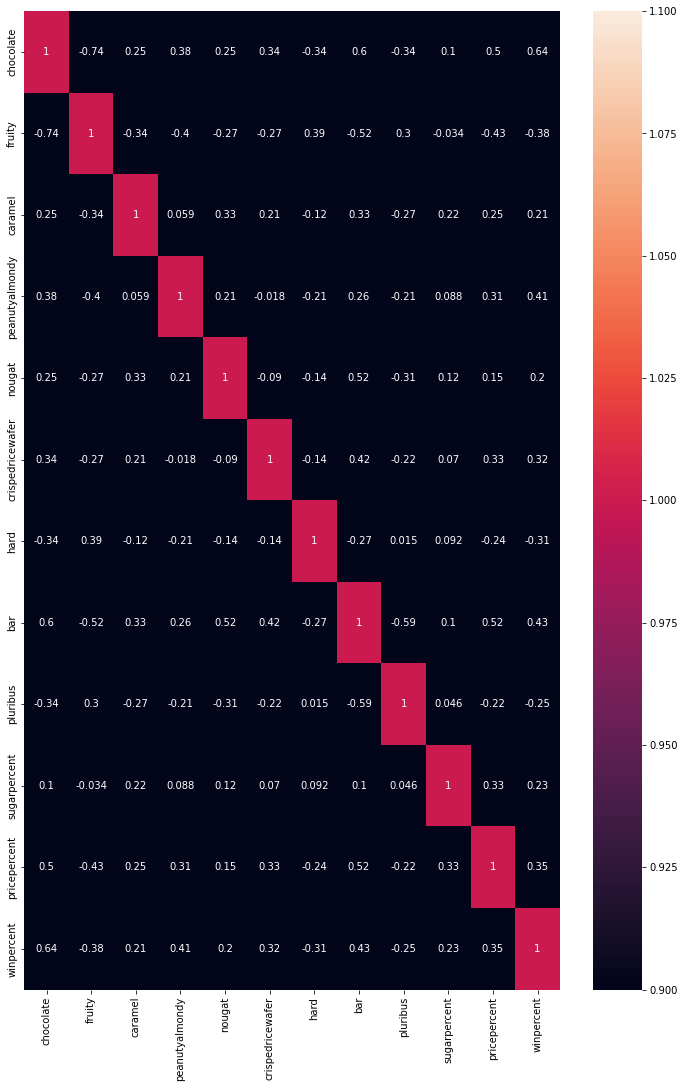

In [41]:
#defining the figure size
plt.figure(figsize=(12,18))
#plotting the heatmap
sns.heatmap(df.corr(),annot=True,vmin=1,vmax=1)
plt.show()

# Preprocessing

In [42]:
#checking for null  value
df.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [43]:
y=df['bar']
x=df.drop(['bar','competitorname'],axis=1)

In [44]:

scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [45]:
x

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,pluribus,sugarpercent,pricepercent,winpercent
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.737973,0.879793,0.721251
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.606960,0.518135,0.731475
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.108808,0.158998
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.518135,0.383432
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916070,0.518135,0.484266
...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213920,0.108808,0.372900
81,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083930,0.108808,0.268350
82,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.309110,0.312953,0.355231
83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.179120,0.265285,0.315202


# Train Test Split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

# Training

In [50]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8846153846153846